In [80]:
# import libraries
import os
import csv
import pandas as pd

In [81]:
# Jicheol's directory
os.chdir("/Users/jicheolha/Dropbox/DOJTextAnalysis/")

In [82]:
# Jetson's directory
#os.chdir("/Users/jetson/Dropbox/Research/FraudPerspective/DOJTextAnalysis/")

In [83]:
datapath = "data/"
codepath = "code/"
outpath = "results/"

In [84]:
# Read in JSONS

In [85]:
DOJ = pd.read_json(datapath + "doj.json")
#DOJ.head()

In [86]:
DOJ1 = pd.read_json(datapath + "doj_1.json")
#DOJ1.head()

In [87]:
OAUSA = pd.read_json(datapath + "oausa.json")
#OAUSA.head()

In [88]:
## Concatenate JSONS
DOJall = pd.concat([DOJ, DOJ1, OAUSA])
#DOJall.head()

In [89]:
# Nrows
print(DOJall.shape)

(7204, 7)


In [90]:
# Create IDs
DOJall = DOJall.reset_index()
DOJall = DOJall.rename(columns = {'index':'id'})
DOJall.head()

,id,url,date,title,pr,topics,components,pr_num
0,0,https://www.justice.gov//opa/pr/detroit-area-r...,2009-09-28T00:00:00-04:00,Detroit-Area Rehabilition Facility Executive P...,WASHINGTON – Suresh Chand pleaded guilty tod...,None,Criminal Division,09-1040
1,1,https://www.justice.gov//opa/pr/brooklyn-ny-ph...,2012-12-10T00:00:00-05:00,"Brooklyn, N.Y., Physician and Clinic President...",WASHINGTON – A medical doctor and the presi...,None,Criminal Division,12-1474
2,2,https://www.justice.gov//opa/pr/texas-physicia...,2019-10-07T00:00:00-04:00,Texas Physician Convicted in $16 Million Medic...,A federal jury in Texas found a physician who ...,Health Care Fraud,"Criminal Division, Criminal - Criminal Fraud S...","19-1,080"
3,3,https://www.justice.gov//opa/pr/departments-ju...,2012-04-04T00:00:00-04:00,Departments of Justice and Health and Human Se...,WASHINGTON – At a Chicago summit highlightin...,None,Office of the Attorney General,12-429
4,4,https://www.justice.gov//opa/pr/two-south-texa...,2019-01-29T00:00:00-05:00,Two South Texas Doctors Sentenced to Prison fo...,"Two Houston, Texas physicians were sentenced ...",Health Care Fraud,"Criminal Division, Criminal - Criminal Fraud S...",19-23


In [91]:
## List of fraud words
fraud = list(pd.read_csv(datapath + "fraud.csv")["Fraud"])
print(fraud)

['unnecessary', 'not provided', 'unbundling', 'upcoding', 'card sharing', 'collusion', 'drug diversion', 'kickback', 'multiple cards', 'eligibility', 'off-label ', 'ghost', 'off label']


In [92]:
## List of AAMC words
aamc = list(pd.read_csv(datapath + "AAMC.csv")["AAMC"])
#print(aamc)

In [93]:
# List of MDC words
mdc = list(pd.read_csv(datapath + "MDC.csv")["MDC"])
#print(mdc)

In [94]:
# List of States
states = list(pd.read_csv(datapath + "states.csv")["States"])
#print(states)

In [95]:
# Tag States
for term in states:
    DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")

In [96]:
# Tag fraud
for term in fraud:
    DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")

In [97]:
# Tag medical
for term in aamc:
    DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
    
for term in mdc:
    DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
      

/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DOJall[term] = DOJall["pr"].str.contains(term, case = False).astype("int")
/var/folders/49/y1vrdbfd7cbgcwtbbl6q8bsr0000gn/T/ipykernel_74312/1220282834.py:6: PerformanceWarning: DataFrame is highly fragme

In [98]:
DOJall.head()

,id,url,date,title,pr,topics,components,pr_num,Alaska,Alabama,...,pregnan,childbirth,neonat,immunolo,myeloprolifera,mental dis,poison,burns,trauma,virus inf
0,0,https://www.justice.gov//opa/pr/detroit-area-r...,2009-09-28T00:00:00-04:00,Detroit-Area Rehabilition Facility Executive P...,WASHINGTON – Suresh Chand pleaded guilty tod...,None,Criminal Division,09-1040,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.justice.gov//opa/pr/brooklyn-ny-ph...,2012-12-10T00:00:00-05:00,"Brooklyn, N.Y., Physician and Clinic President...",WASHINGTON – A medical doctor and the presi...,None,Criminal Division,12-1474,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://www.justice.gov//opa/pr/texas-physicia...,2019-10-07T00:00:00-04:00,Texas Physician Convicted in $16 Million Medic...,A federal jury in Texas found a physician who ...,Health Care Fraud,"Criminal Division, Criminal - Criminal Fraud S...","19-1,080",0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,https://www.justice.gov//opa/pr/departments-ju...,2012-04-04T00:00:00-04:00,Departments of Justice and Health and Human Se...,WASHINGTON – At a Chicago summit highlightin...,None,Office of the Attorney General,12-429,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://www.justice.gov//opa/pr/two-south-texa...,2019-01-29T00:00:00-05:00,Two South Texas Doctors Sentenced to Prison fo...,"Two Houston, Texas physicians were sentenced ...",Health Care Fraud,"Criminal Division, Criminal - Criminal Fraud S...",19-23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
DOJall.to_csv("data/DOJ_PR_Tagged.csv")

In [100]:
StateTable = pd.DataFrame(DOJall[states].sum(axis = 0))
StateTable.columns = ["Freq"]
StateTable = StateTable.sort_values("Freq", ascending = False)
StateTable.head(10)
#StateTable.to_csv(outpath + "StateTable.csv")

,Freq
D.C.,6849
Florida,1325
Texas,843
New York,788
Washington,757
California,702
Pennsylvania,505
Michigan,496
Virginia,407
New Jersey,402


In [101]:
FraudTable = pd.DataFrame(DOJall[fraud].sum(axis = 0))
FraudTable.columns = ["Freq"]
FraudTable = FraudTable.sort_values("Freq", ascending = False)
FraudTable.head(10)
#FraudTable.to_csv(outpath + "FraudTable.csv")

,Freq
kickback,2047
unnecessary,1627
not provided,541
eligibility,105
drug diversion,73
upcoding,51
off-label,51
collusion,39
ghost,25
unbundling,8


In [102]:
MedTable = pd.DataFrame(DOJall[aamc + mdc].sum(axis = 0))
MedTable.columns = ["Freq"]
MedTable = MedTable.sort_values("Freq", ascending = False)
MedTable.head(10)
#MedTable.to_csv(outpath + "MedTable.csv")

,Freq
pain,561
emergency,275
hospice,177
psychiat,162
genetic,146
cardiolo,130
oncolog,101
vascular,96
sports,92
urolo,87


In [103]:
StateTable.head()

,Freq
D.C.,6849
Florida,1325
Texas,843
New York,788
Washington,757


In [104]:
StateBenes = pd.read_csv(datapath + "2020MedicareState.csv")
StateBenes.head()

,State,MedicareBenes,BeneShare
0,United States,"61,551,947",1.000000
1,California,"6,411,106",0.104158
2,Florida,"4,680,137",0.076036
3,Texas,"4,286,051",0.069633
4,New York,"3,672,562",0.059666


In [105]:
StateTable2 = StateTable.reset_index()
StateTable2.columns = ["State", "PRFreq"]
StateTableFull = StateTable2.merge(StateBenes, on = "State")

In [106]:
StateTableFull = StateTableFull[StateTableFull["State"] != "D.C."]
StateTableFull["PRShare"] = StateTableFull["PRFreq"]/StateTableFull["PRFreq"].sum()
StateTableFull.sort_values("PRShare", ascending = False).to_csv(outpath + "StateBenePRTable.csv")
StateTableFull.head()

,State,PRFreq,MedicareBenes,BeneShare,PRShare
1,Florida,1325,"4,680,137",0.076036,0.121515
2,Texas,843,"4,286,051",0.069633,0.077311
3,New York,788,"3,672,562",0.059666,0.072267
4,California,702,"6,411,106",0.104158,0.064380
5,Pennsylvania,505,"2,776,113",0.045102,0.046313


In [107]:
## Where are the kickbacks? 
print(DOJall[DOJall["kickback"] == 1].shape)
kickback = DOJall[DOJall["kickback"] == 1][states].sum(axis = 0).sort_values(ascending = False)
print(kickback)

(2047, 161)
D.C.              2047
Florida            737
Washington         309
Texas              279
California         251
New York           241
Michigan           217
New Jersey         177
Pennsylvania       157
Louisiana          128
Georgia            112
Tennessee          102
Illinois           101
Massachusetts      100
South Carolina      85
Virginia            83
North Carolina      81
Ohio                78
Kentucky            74
Mississippi         55
Alabama             49
Arizona             43
Missouri            41
Oklahoma            36
Maryland            35
Indiana             33
Kansas              32
Maine               28
Delaware            28
Connecticut         27
West Virginia       26
Nevada              25
Minnesota           23
Vermont             23
Colorado            21
Iowa                19
Puerto Rico         17
South Dakota        17
Utah                16
Rhode Island        16
Oregon              14
Wisconsin           13
Nebraska            12

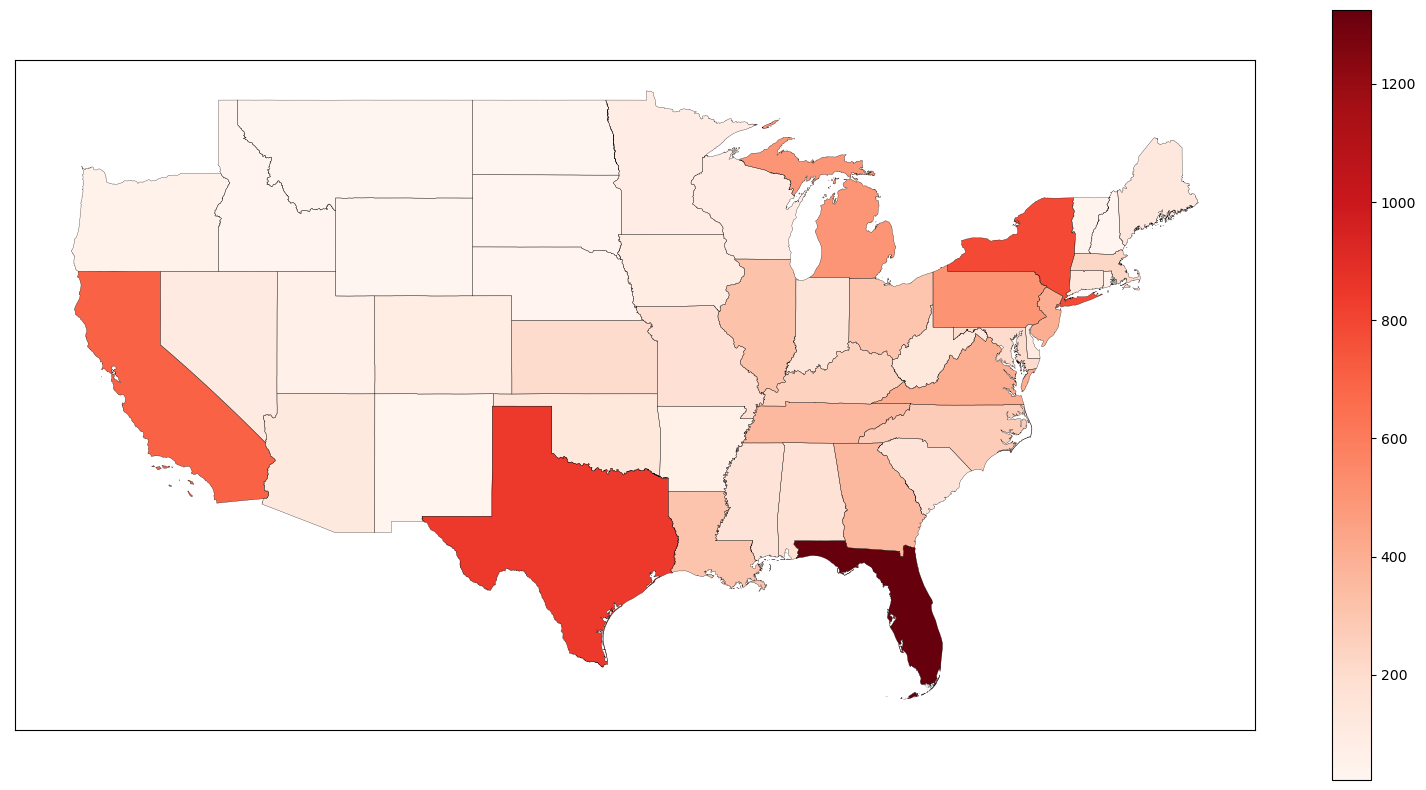

In [108]:
# State Occurrence Map
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv(outpath + "StateTable.csv")

# Rename columns of df
df.columns = ['State', 'Frequency']

# Import shapefile of US states
shape = gpd.read_file(datapath + '/reshape files/cb_2018_us_state_500k.shp')

# Merge NAME and State columns
shape = pd.merge(
    left = shape, 
    right = df, 
    left_on = 'NAME',
    right_on = 'State', 
    how = 'left')

# Take out US Territories 
shape = shape[~shape['NAME'].isin(['Alaska', 'Guam', 'Hawaii', 'Puerto Rico', 'Virgin Islands', 'American Samoa'])]
shape = shape.dropna()

# Chloropleth
ax = shape.boundary.plot(edgecolor = 'black', linewidth = 0.2, figsize = (20,10))
shape.plot(ax = ax, column = 'Frequency', legend = True, cmap = 'Reds')

# No axis
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

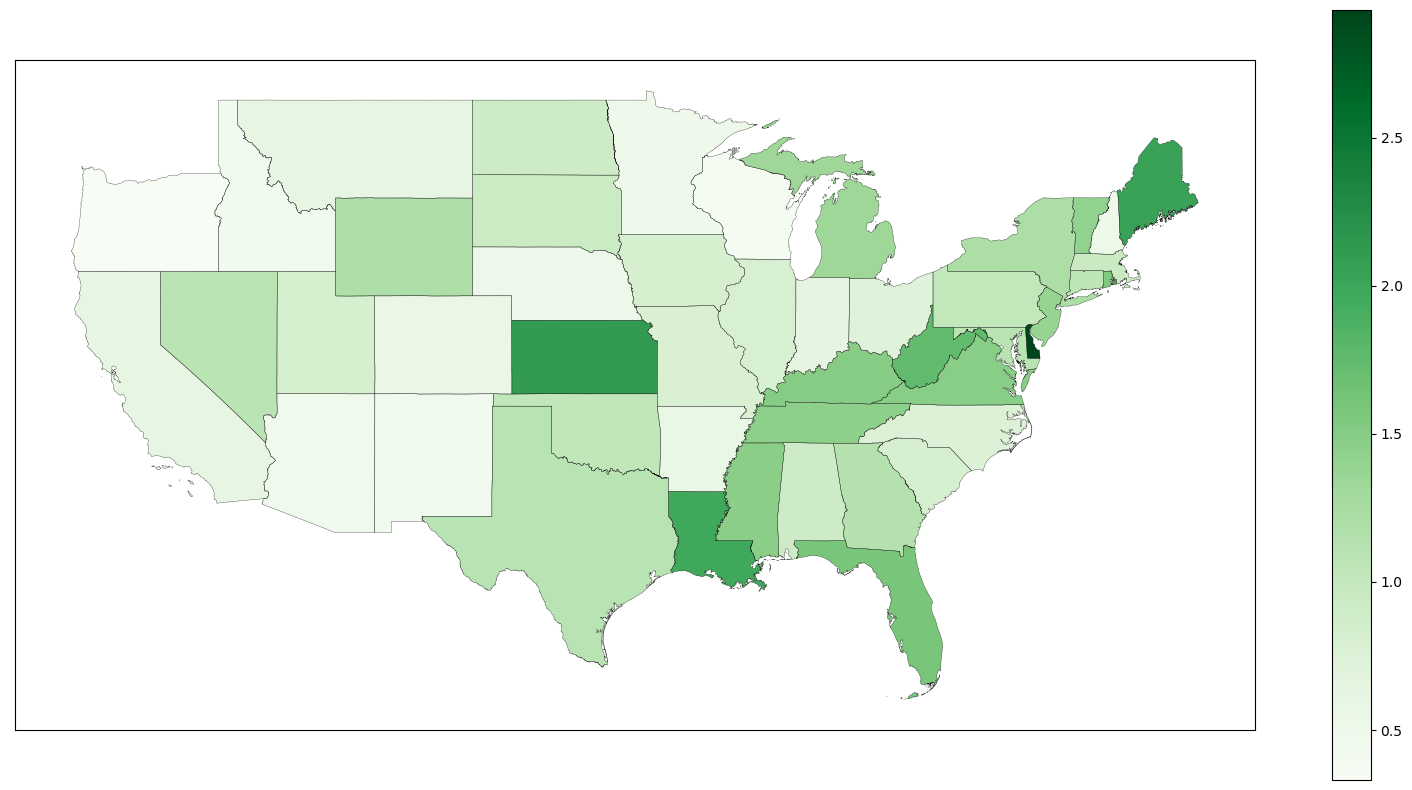

In [109]:
#State benefits PR Table

import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv(outpath + "StateBenePRTable.csv")

# Rename columns of df
df.columns = ['Id', 'State', 'PRFreq', 'MedicareBenes', 'BeneShare', 'PRShare']
df["Ratio"] = df["PRShare"]/df["BeneShare"]

# Import shapefile of US states
shape = gpd.read_file(datapath + '/reshape files/cb_2018_us_state_500k.shp')

# Merge NAME and State columns
shape = pd.merge(
    left = shape, 
    right = df, 
    left_on = 'NAME',
    right_on = 'State', 
    how = 'left')

# Take out US Territories 
shape = shape[~shape['NAME'].isin(['Alaska', 'Guam', 'Hawaii', 'Puerto Rico', 'Virgin Islands', 'American Samoa'])]
shape = shape.dropna()

# Chloropleth
ax = shape.boundary.plot(edgecolor = 'black', linewidth = 0.2, figsize = (20,10))
shape.plot(ax = ax, column = 'Ratio', legend = True, cmap = 'Greens')

# No axis
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [110]:
df.sort_values("Ratio", ascending = False)

,Id,State,PRFreq,MedicareBenes,BeneShare,PRShare,Ratio
28,29,Delaware,112,"215,724",0.003505,0.010271,2.930728
38,39,Alaska,40,"104,465",0.001697,0.003668,2.161450
16,17,Kansas,205,"546,423",0.008877,0.018800,2.117780
26,27,Maine,126,"347,594",0.005647,0.011555,2.046229
11,12,Louisiana,311,"884,245",0.014366,0.028522,1.985380
24,25,West Virginia,137,"442,688",0.007192,0.012564,1.746943
0,1,Florida,1325,"4,680,137",0.076036,0.121515,1.598134
35,36,Rhode Island,62,"224,732",0.003651,0.005686,1.557337
14,15,Kentucky,251,"943,242",0.015324,0.023019,1.502127
6,7,Virginia,407,"1,545,578",0.025110,0.037326,1.486481
